# Telecom Churn Prediction

You will use 21 variables related to customer behaviour (such as monthly bill, internet usage, etc.) to predict whether a particular customer will switch to another telecom provider or not, i.e., whether they will churn or not.

## Step 1: Importing and Merging Data

In [61]:
#Supressing warnings
import warnings
warnings.filterwarnings("ignore")


In [62]:
#Importing Pandas and Numpy
import pandas as pd,numpy as np

In [63]:
# Importing all datasets
churn_data=pd.read_csv("churn_data.csv")

In [64]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
customer_data=pd.read_csv("customer_data.csv")

In [66]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [67]:
internet_data=pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### Combining all the data files into one consolidated dataframe

In [68]:
# merging on customer_id
df_1=pd.merge(churn_data,customer_data,how="inner",on="customerID")

In [69]:
#Final dataframe
telecom=pd.merge(df_1,internet_data,how="inner",on="customerID")

## Inspecting the dataframe

In [70]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [71]:
telecom.shape

(7043, 21)

In [72]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [73]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


## Data preparation

### Converting some binary variables to 0/1

In [74]:
# List of variables to map
varlist=["PhoneService","PaperlessBilling","Churn","Partner","Dependents"]

def binary_map(x):
    return x.map({"Yes":1,"No":0})

telecom[varlist]=telecom[varlist].apply(binary_map)

In [75]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [76]:
##For cataegorical variables with multiple levels, creating dummy variables, one hot encoded.


dummy1= pd.get_dummies(telecom[["Contract", "gender", "InternetService"]], drop_first=True)
# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [77]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,Yes,No,No,No,No,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,Yes,No,No,No,1,0,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,Yes,No,No,No,No,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,Yes,Yes,No,No,1,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,No,No,No,0,0,0,1,0


In [78]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [79]:
pm= pd.get_dummies(telecom["PaymentMethod"], drop_first=True)
# Adding the results to the master dataframe
telecom = pd.concat([telecom, pm], axis=1)

In [80]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,0,1,0,1,0,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,1,0,1,0,1,0,0,0,1
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,0,1,0,1,0,0,0,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,1,1,0,1,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,1,0,1,0,1,0,0,1,0


### Dropping repeated variables as we have created dummy variables

In [81]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [82]:
telecom.isnull().sum()

customerID                     0
tenure                         0
PhoneService                   0
PaperlessBilling               0
MonthlyCharges                 0
TotalCharges                   0
Churn                          0
SeniorCitizen                  0
Partner                        0
Dependents                     0
Contract_One year              0
Contract_Two year              0
gender_Male                    0
InternetService_Fiber optic    0
InternetService_No             0
MultipleLines_No               0
MultipleLines_Yes              0
OnlineSecurity_No              0
OnlineSecurity_Yes             0
OnlineBackup_No                0
OnlineBackup_Yes               0
DeviceProtection_No            0
DeviceProtection_Yes           0
TechSupport_No                 0
TechSupport_Yes                0
StreamingTV_No                 0
StreamingTV_Yes                0
StreamingMovies_No             0
StreamingMovies_Yes            0
Credit card (automatic)        0
Electronic

In [83]:
(telecom['TotalCharges'] == " ").sum()

11

In [84]:
telecom=telecom[~(telecom.TotalCharges==" ")]

In [85]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7032 non-null   object 
 1   tenure                       7032 non-null   int64  
 2   PhoneService                 7032 non-null   int64  
 3   PaperlessBilling             7032 non-null   int64  
 4   MonthlyCharges               7032 non-null   float64
 5   TotalCharges                 7032 non-null   object 
 6   Churn                        7032 non-null   int64  
 7   SeniorCitizen                7032 non-null   int64  
 8   Partner                      7032 non-null   int64  
 9   Dependents                   7032 non-null   int64  
 10  Contract_One year            7032 non-null   uint8  
 11  Contract_Two year            7032 non-null   uint8  
 12  gender_Male                  7032 non-null   uint8  
 13  InternetService_Fi

In [86]:
## Convert total charges obj type into numeric
telecom.TotalCharges=telecom.TotalCharges.astype(float,errors="ignore")

In [87]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7032 non-null   object 
 1   tenure                       7032 non-null   int64  
 2   PhoneService                 7032 non-null   int64  
 3   PaperlessBilling             7032 non-null   int64  
 4   MonthlyCharges               7032 non-null   float64
 5   TotalCharges                 7032 non-null   float64
 6   Churn                        7032 non-null   int64  
 7   SeniorCitizen                7032 non-null   int64  
 8   Partner                      7032 non-null   int64  
 9   Dependents                   7032 non-null   int64  
 10  Contract_One year            7032 non-null   uint8  
 11  Contract_Two year            7032 non-null   uint8  
 12  gender_Male                  7032 non-null   uint8  
 13  InternetService_Fi

## Checking for outliers

In [88]:
telecom.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Credit card (automatic),Electronic check,Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.162400,0.482509,0.298493,0.209329,...,0.343857,0.493743,0.290102,0.399460,0.384386,0.395478,0.388367,0.216297,0.336320,0.228100
std,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.368844,0.499729,0.457629,0.406858,...,0.475028,0.499996,0.453842,0.489822,0.486484,0.488988,0.487414,0.411748,0.472483,0.419637
min,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [90]:
#tenure, MonthlyCharges, TotalCharges
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom = telecom[['tenure','MonthlyCharges','TotalCharges']]
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000
99%,72.000000,114.734500,8039.883000


### From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

## Checking for Missing Values and Inputing Them

In [91]:
telecom.isnull().sum()

customerID                     0
tenure                         0
PhoneService                   0
PaperlessBilling               0
MonthlyCharges                 0
TotalCharges                   0
Churn                          0
SeniorCitizen                  0
Partner                        0
Dependents                     0
Contract_One year              0
Contract_Two year              0
gender_Male                    0
InternetService_Fiber optic    0
InternetService_No             0
MultipleLines_No               0
MultipleLines_Yes              0
OnlineSecurity_No              0
OnlineSecurity_Yes             0
OnlineBackup_No                0
OnlineBackup_Yes               0
DeviceProtection_No            0
DeviceProtection_Yes           0
TechSupport_No                 0
TechSupport_Yes                0
StreamingTV_No                 0
StreamingTV_Yes                0
StreamingMovies_No             0
StreamingMovies_Yes            0
Credit card (automatic)        0
Electronic

#### No missing values in dataset

In [92]:
(telecom.TotalCharges==" ").sum()

0

## Train-Test Split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# Updating values of X and y
## Why we drop customerID? a)customerID is just an identifier, like a name or serial number. b) It has no relationship with whether a customer churns or not.

X=telecom.drop(["Churn","customerID"],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Credit card (automatic),Electronic check,Mailed check
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,1,0,1,0,1,0,0,0,1
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,1,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [95]:
y=telecom["Churn"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [96]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Credit card (automatic),Electronic check,Mailed check
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,0,0,1,0,1,0,1,0
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0


In [99]:
# Checking the churn rate
churn= (sum(telecom["Churn"])/len(telecom["Churn"].index))*100

In [100]:
churn

26.578498293515356

## Checking the correlations

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

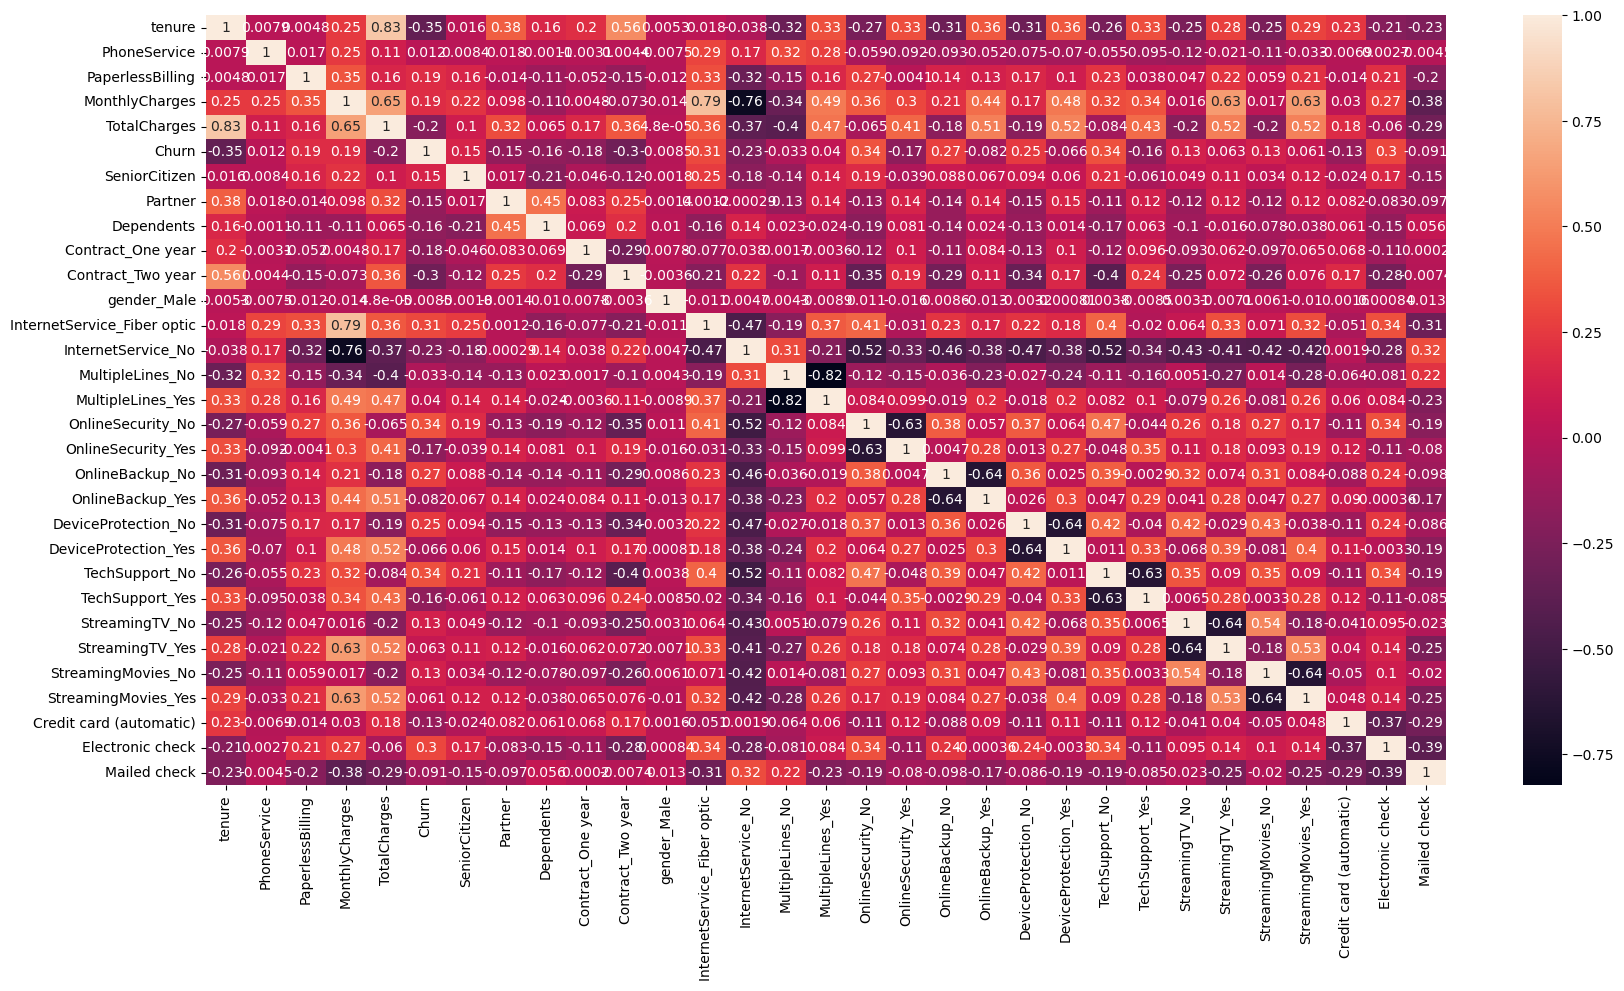

In [102]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [103]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [104]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7032 non-null   object 
 1   tenure                       7032 non-null   int64  
 2   PhoneService                 7032 non-null   int64  
 3   PaperlessBilling             7032 non-null   int64  
 4   MonthlyCharges               7032 non-null   float64
 5   TotalCharges                 7032 non-null   float64
 6   Churn                        7032 non-null   int64  
 7   SeniorCitizen                7032 non-null   int64  
 8   Partner                      7032 non-null   int64  
 9   Dependents                   7032 non-null   int64  
 10  Contract_One year            7032 non-null   uint8  
 11  Contract_Two year            7032 non-null   uint8  
 12  gender_Male                  7032 non-null   uint8  
 13  InternetService_Fi

In [105]:
corr_matrix = telecom.corr()

In [106]:
corr_matrix

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Credit card (automatic),Electronic check,Mailed check
tenure,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,0.015683,0.381912,0.163386,0.202338,...,0.361520,-0.264363,0.325288,-0.246814,0.280264,-0.252890,0.285402,0.232800,-0.210197,-0.232181
PhoneService,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,0.008392,0.018397,-0.001078,-0.003142,...,-0.070076,-0.055102,-0.095138,-0.123159,-0.021383,-0.111273,-0.033477,-0.006916,0.002747,-0.004463
PaperlessBilling,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,0.156258,-0.013957,-0.110131,-0.052278,...,0.104079,0.229875,0.037536,0.046715,0.224241,0.058987,0.211583,-0.013726,0.208427,-0.203981
MonthlyCharges,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,0.219874,0.097825,-0.112343,0.004810,...,0.482607,0.321267,0.338301,0.016015,0.629668,0.017271,0.627235,0.030055,0.271117,-0.376568
TotalCharges,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,0.102411,0.319072,0.064653,0.170569,...,0.522881,-0.084270,0.432868,-0.197144,0.515709,-0.202605,0.519867,0.182663,-0.060436,-0.294708
Churn,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,0.150541,-0.149982,-0.163128,-0.178225,...,-0.066193,0.336877,-0.164716,0.128435,0.063254,0.130920,0.060860,-0.134687,0.301455,-0.090773
SeniorCitizen,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,1.000000,0.016957,-0.210550,-0.046491,...,0.059514,0.205254,-0.060577,0.048664,0.105445,0.034196,0.119842,-0.024359,0.171322,-0.152987
Partner,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,0.016957,1.000000,0.452269,0.083067,...,0.153556,-0.108875,0.120206,-0.123394,0.124483,-0.117488,0.118108,0.082327,-0.083207,-0.096948
Dependents,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,-0.210550,0.452269,1.000000,0.069222,...,0.013900,-0.171164,0.063053,-0.099912,-0.016499,-0.078245,-0.038375,0.061134,-0.149274,0.056448
Contract_One year,0.202338,-0.003142,-0.052278,0.004810,0.170569,-0.178225,-0.046491,0.083067,0.069222,1.000000,...,0.102911,-0.118709,0.096258,-0.093495,0.061930,-0.096613,0.064780,0.067590,-0.109546,0.000197


In [107]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

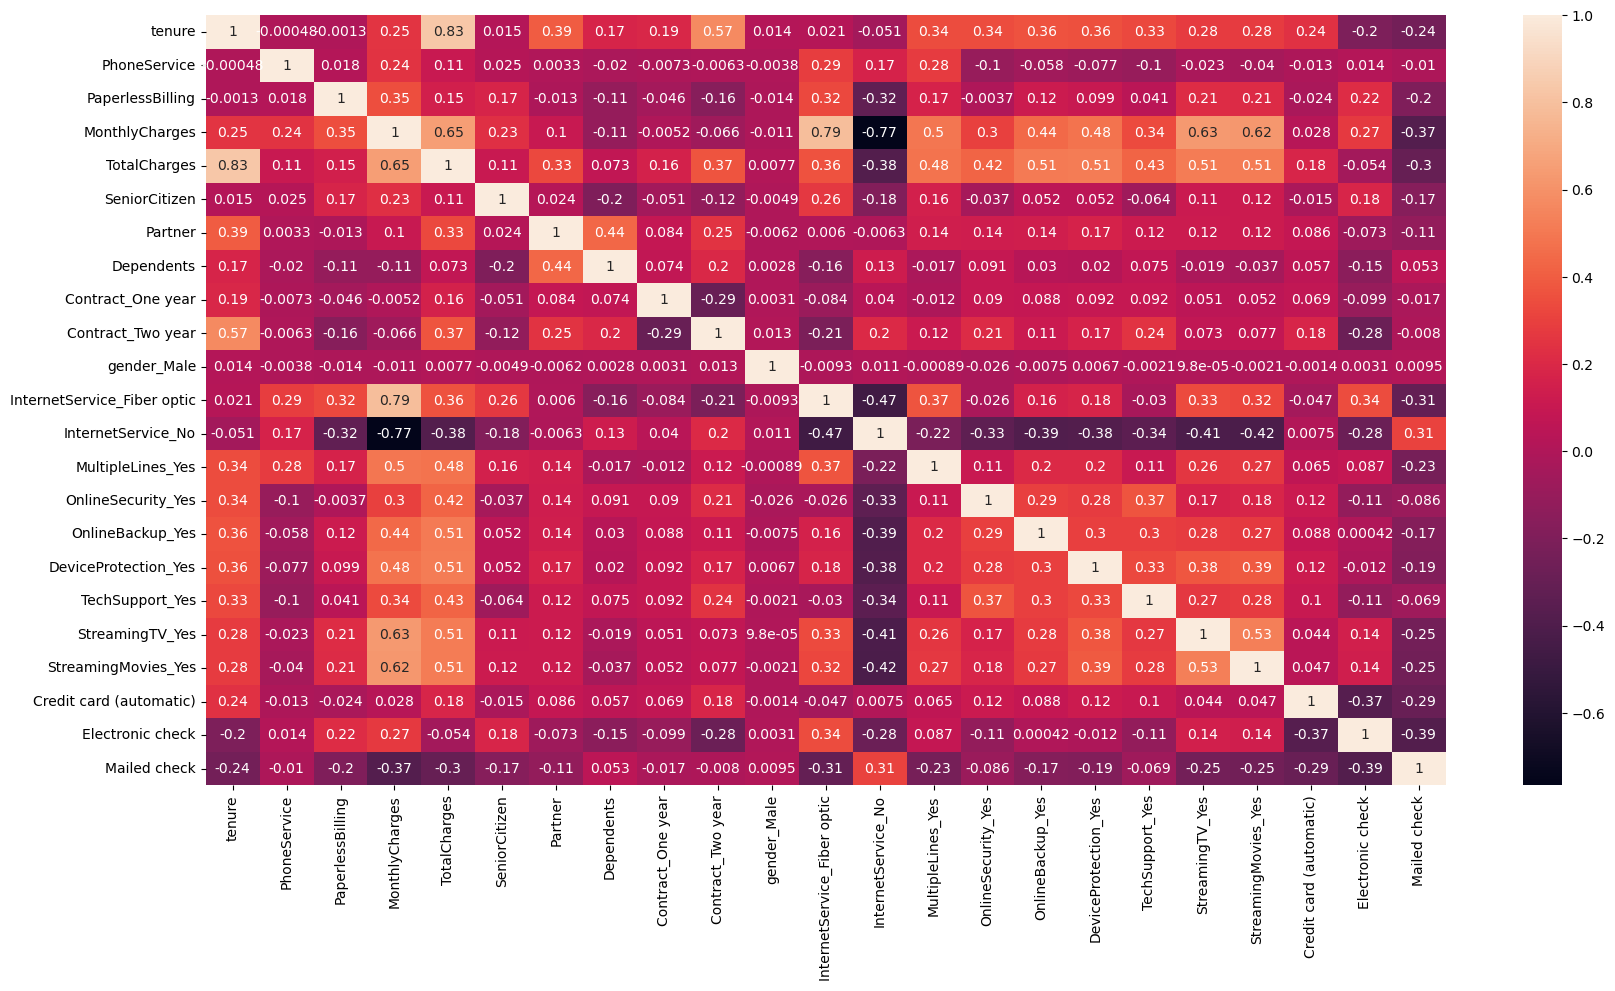

In [108]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building

In [109]:
## First Model

import statsmodels.api as sm

In [110]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 10 Sep 2025   Deviance:                       4009.4
Time:                        21:28:29   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                         -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                    0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                 -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                    0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                   0.3984      0.102      3.924      0.000       0.199       0.597
Partner                         0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                     -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year              -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year              -1.2455      0.212     -5.874      0.000      -1.661      -0.830
gender_Male                    -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic     2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No             -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes               0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes             -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes            0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                 0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes             0.8484      0.396      2.143      0.032       0.072       1.624
Credit card (automatic)        -0.2577      0.137     -1.883      0.060      -0.526       0.011
Electronic check                0.1615      0.113      1.434      0.152      -0.059       0.382
Mailed check                   -0.2536      0.137     -1.845      0.065      -0.523       0.016
===============================================================================================
"""

## Feature selection using RFE

In [111]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()


In [113]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [114]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True])

In [115]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1),
 ('Credit card (automatic)', True, 1),
 ('Electronic check', False, 4),
 ('Mailed check', True, 1)]

In [116]:
Col=X_train.columns[rfe.support_]

In [117]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents', 'gender_Male',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'Electronic check'],
      dtype='object')

In [119]:
# Assessing the model with statsmodels
X_train_sm=sm.add_constant(X_train[Col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Wed, 10 Sep 2025   Deviance:                       4022.2
Time:                        21:47:22   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                         -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                 -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                    0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                   0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year              -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year              -1.2931      0.211     -6.138      0.000      -1.706      -0.880
InternetService_Fiber optic     1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No             -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes               0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                 0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes             0.4665      0.111      4.197      0.000       0.249       0.684
Credit card (automatic)        -0.3724      0.113     -3.308      0.001      -0.593      -0.152
Mailed check                   -0.3723      0.111     -3.345      0.001      -0.591      -0.154
===============================================================================================
"""

In [123]:
# p values are under threshold
## Getting the predicted values on the train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [124]:
y_train_pred.shape

(4922,)

In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

### Creating dataframe with the actual churn flag and the predicted probabilities

In [126]:
y_train_pred_final=pd.DataFrame({'Churn': y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final["CustID"]=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [127]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


In [128]:
from sklearn import metrics
# Confusion Matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)

In [129]:
print(confusion)

[[3275  360]
 [ 574  713]]


In [130]:
# Accusracy of the model
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8102397399431126


## Checking VIFs

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [132]:
#Create a dataframe that will contain the names of all the feature variables
vif=pd.DataFrame()
vif['Features']=X_train[Col].columns
vif['VIF']=[variance_inflation_factor(X_train[Col].values,i)for i in range(X_train[Col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)

In [133]:
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
7,InternetService_Fiber optic,5.61
8,InternetService_No,5.27
6,Contract_Two year,3.14
11,StreamingTV_Yes,2.79
12,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
9,MultipleLines_Yes,2.38


#### There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'TotalCharges' is derived from tenure and monthly charges.. So let's start by dropping that.

In [134]:
Col=Col.drop("TotalCharges",1)
Col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Credit card (automatic)',
       'Mailed check'],
      dtype='object')

In [135]:
## Let's rerun the model
X_train_sm=sm.add_constant(X_train[Col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.5
Date:                Thu, 11 Sep 2025   Deviance:                       4037.1
Time:                        12:38:28   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2803
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.1697      0.186    -11.663      0.000      -2.534      -1.805
tenure                         -0.9137      0.065    -13.982      0.000      -1.042      -0.786
PaperlessBilling                0.3332      0.089      3.726      0.000       0.158       0.508
MonthlyCharges                 -0.7106      0.184     -3.854      0.000      -1.072      -0.349
SeniorCitizen                   0.4407      0.100      4.404      0.000       0.245       0.637
Contract_One year              -0.6821      0.127     -5.374      0.000      -0.931      -0.433
Contract_Two year              -1.2558      0.208     -6.034      0.000      -1.664      -0.848
InternetService_Fiber optic     1.5264      0.213      7.166      0.000       1.109       1.944
InternetService_No             -1.5165      0.208     -7.278      0.000      -1.925      -1.108
MultipleLines_Yes               0.3872      0.104      3.739      0.000       0.184       0.590
TechSupport_Yes                -0.2426      0.109     -2.224      0.026      -0.456      -0.029
StreamingTV_Yes                 0.5779      0.113      5.126      0.000       0.357       0.799
StreamingMovies_Yes             0.4667      0.110      4.226      0.000       0.250       0.683
Credit card (automatic)        -0.3774      0.113     -3.348      0.001      -0.598      -0.156
Mailed check                   -0.3207      0.110     -2.917      0.004      -0.536      -0.105
===============================================================================================
"""

In [136]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [137]:
y_train_pred[:10]

array([0.22669491, 0.32279486, 0.61112237, 0.56497818, 0.68324356,
       0.38658503, 0.36867571, 0.80505887, 0.25567371, 0.52400218])

In [138]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [139]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.226695,879,0
1,0,0.322795,5790,0
2,1,0.611122,6498,1
3,1,0.564978,880,1
4,1,0.683244,2784,1


In [140]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8063795205201137


In [142]:
### Let's check the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[Col].columns
vif['VIF'] = [variance_inflation_factor(X_train[Col].values, i) for i in range(X_train[Col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,10.63
6,InternetService_Fiber optic,5.44
7,InternetService_No,5.15
5,Contract_Two year,3.13
10,StreamingTV_Yes,2.79
11,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
0,tenure,2.38
8,MultipleLines_Yes,2.38
9,TechSupport_Yes,1.94


In [143]:
### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only. Monthly charges is imp factor to understand churn. So no need to drop as p value is ok.

In [144]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3278,  357],
       [ 596,  691]], dtype=int64)

## Receiver Operating Characteristic Curve

In [145]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [146]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

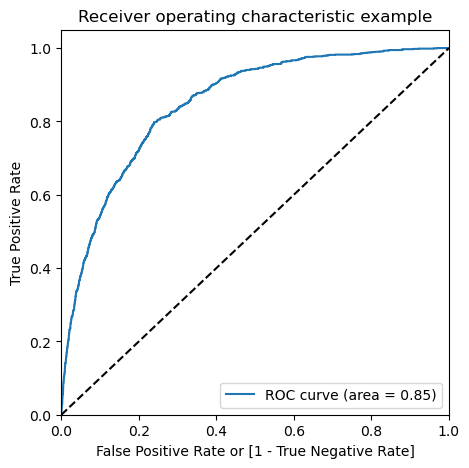

In [147]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

## Finding Optimal Cutoff Points

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [149]:
#Let's create the columns with different probability cutoffs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.226695,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.322795,5790,0,1,1,1,1,0,0,0,0,0,0
2,1,0.611122,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.564978,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.683244,2784,1,1,1,1,1,1,1,1,0,0,0


In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

In [151]:
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.618448  0.942502  0.503714
0.2   0.2  0.722267  0.849262  0.677304
0.3   0.3  0.772247  0.770008  0.773040
0.4   0.4  0.793377  0.651127  0.843741
0.5   0.5  0.806380  0.536908  0.901788
0.6   0.6  0.801910  0.394716  0.946080
0.7   0.7  0.778545  0.205905  0.981293
0.8   0.8  0.750102  0.052059  0.997249
0.9   0.9  0.738521  0.000000  1.000000


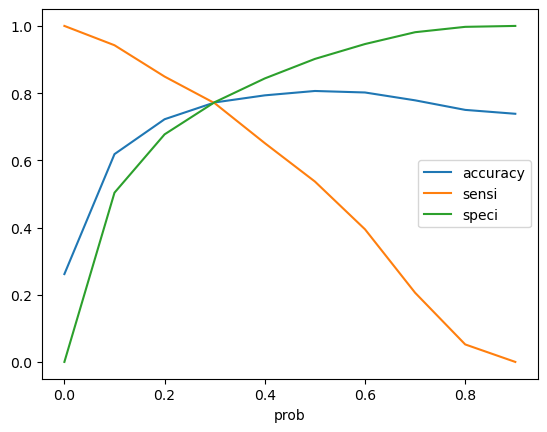

In [152]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [153]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.226695,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.322795,5790,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.611122,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.564978,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.683244,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [154]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7722470540430719

In [155]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2810,  825],
       [ 296,  991]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.77000777000777

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.7730398899587345

In [160]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22696011004126548


In [161]:
# Positive predictive value 
print (TP / float(TP+FP))

0.545704845814978


In [162]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9047005795235029


In [163]:
# Precision( True predictive value)
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6593511450381679

In [164]:
#Recall( Sensitivity)
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5369075369075369

## Precision and Recall Tradeoff

In [165]:
from sklearn.metrics import precision_recall_curve

In [166]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

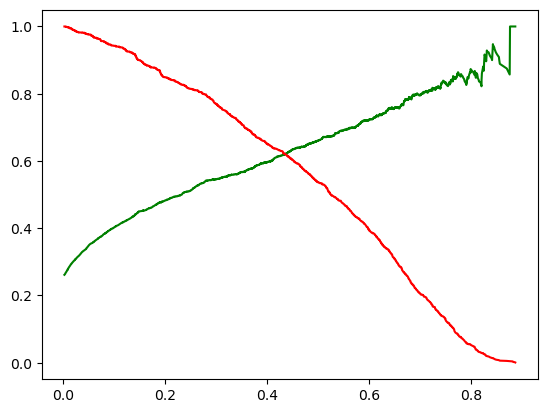

In [168]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [169]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [170]:
X_test = X_test[Col]
X_test.head()

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Credit card (automatic),Mailed check
942,-0.347623,1,0.499951,0,0,0,1,0,0,0,0,1,1,0
3730,0.999203,1,1.319685,0,0,0,1,0,1,0,1,1,1,0
1761,1.040015,1,-1.342374,0,0,1,0,1,1,0,0,0,1,0
2283,-1.286319,1,0.223935,0,0,0,1,0,0,0,0,0,0,1
1872,0.346196,0,-1.500335,0,0,1,0,1,0,0,0,0,0,0


In [171]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [172]:
y_test_pred = res.predict(X_test_sm)

In [173]:
y_test_pred[:10]

942     0.435743
3730    0.248518
1761    0.009998
2283    0.595171
1872    0.014889
1970    0.697307
2532    0.284275
1616    0.009756
2485    0.598246
5914    0.131993
dtype: float64

In [174]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [175]:
y_pred_1.head()

,0
942,0.435743
3730,0.248518
1761,0.009998
2283,0.595171
1872,0.014889


In [176]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [177]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [178]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [179]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [180]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.435743
1,1,3730,0.248518
2,0,1761,0.009998
3,1,2283,0.595171
4,0,1872,0.014889


In [181]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [182]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]

In [183]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.435743
1,3730,1,0.248518
2,1761,0,0.009998
3,2283,1,0.595171
4,1872,0,0.014889


In [184]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [185]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.435743,1
1,3730,1,0.248518,0
2,1761,0,0.009998,0
3,2283,1,0.595171,1
4,1872,0,0.014889,0


In [186]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7848341232227488

In [187]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1288,  240],
       [ 214,  368]], dtype=int64)

In [188]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [189]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6323024054982818

In [190]:
# Let us calculate specificity
TN / float(TN+FP)

0.8429319371727748

# Using Decision Trees

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [192]:
X_train.shape, X_test.shape

((4922, 30), (2110, 30))

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [195]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [196]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [197]:
from sklearn.metrics import classification_report

In [198]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1528
           1       0.67      0.45      0.54       582

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.77      2110



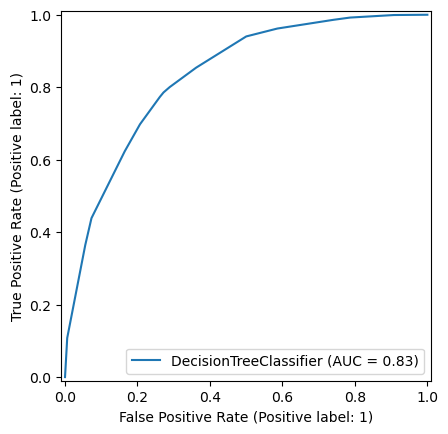

In [201]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt_base, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Decision Tree

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
dt = DecisionTreeClassifier(random_state=42)

In [204]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [205]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [206]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 250 ms
Wall time: 7.13 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [207]:
grid_search.best_score_

0.7986589658747929

In [208]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, random_state=42)

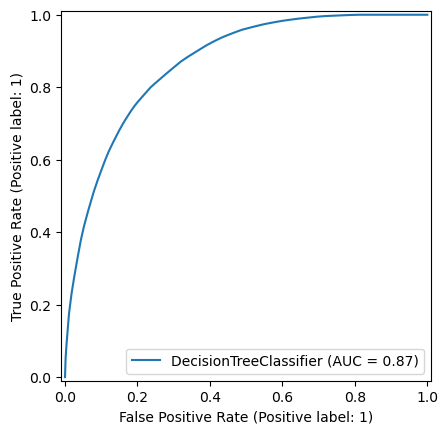

In [210]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
plt.show()

## Using Random Forest

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [213]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [214]:
rf.oob_score_

0.7870784234051199

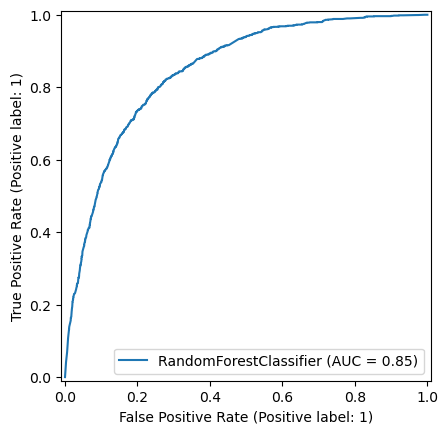

In [216]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [217]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [218]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [219]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [220]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [221]:
grid_search.best_score_

0.8041456149736153

In [222]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [223]:
rf_best.feature_importances_

array([0.18447499, 0.00321436, 0.01811677, 0.09513713, 0.12151566,
       0.01472281, 0.00750892, 0.00676447, 0.03828543, 0.03966379,
       0.01068359, 0.06331272, 0.01365862, 0.00769036, 0.00840873,
       0.08888104, 0.01225616, 0.03211548, 0.01031823, 0.01628751,
       0.00695772, 0.07730226, 0.01733873, 0.00739338, 0.00794572,
       0.00870136, 0.00834979, 0.00584705, 0.05938657, 0.00776063])

In [224]:
feat_importances = pd.Series(rf_best.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False)

tenure                         0.184475
TotalCharges                   0.121516
MonthlyCharges                 0.095137
OnlineSecurity_No              0.088881
TechSupport_No                 0.077302
InternetService_Fiber optic    0.063313
Electronic check               0.059387
Contract_Two year              0.039664
Contract_One year              0.038285
OnlineBackup_No                0.032115
PaperlessBilling               0.018117
TechSupport_Yes                0.017339
DeviceProtection_No            0.016288
SeniorCitizen                  0.014723
InternetService_No             0.013659
OnlineSecurity_Yes             0.012256
gender_Male                    0.010684
OnlineBackup_Yes               0.010318
StreamingMovies_No             0.008701
MultipleLines_Yes              0.008409
StreamingMovies_Yes            0.008350
StreamingTV_Yes                0.007946
Mailed check                   0.007761
MultipleLines_No               0.007690
Partner                        0.007509
